In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r"/home/surya/Downloads/train.csv")

In [3]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = df['label'].values

In [5]:
df.drop(columns = 'label',inplace=True)

In [6]:
x = df.iloc[:,:-1]

In [7]:
from sklearn.preprocessing import StandardScaler
srd = StandardScaler()
srd_data = srd.fit_transform(x)
srd_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Finidng Covariance Matrix

In [8]:
sample_data = srd_data
cov_matrix = np.matmul(sample_data.T,sample_data)
cov_matrix.shape
cov_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Finding Eigen values and vectors

In [10]:
from scipy.linalg import eigh
values , vectors = eigh(cov_matrix,eigvals = (781,782))
vectors = vectors.T
vectors.shape

/tmp/ipykernel_5218/3569354705.py:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values , vectors = eigh(cov_matrix,eigvals = (781,782))


(2, 783)

In [11]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
values

array([1222652.44613786, 1709211.41082575])

In [13]:
exvariance = []
for i in range(len(values)):
    exvariance.append(values[i]/np.sum(values))
exv = exvariance.sort(reverse = True)
exv = np.asarray(exvariance)


In [14]:
np.sum(exv)

1.0

In [15]:
len(vectors)

2

In [16]:
pca_x1 = srd_data.dot(vectors[0])
pca_x2 = srd_data.dot(vectors[1])
pca_x1

array([-5.2264454 ,  6.03299601, -1.70581328, ...,  7.07627667,
       -4.34451279,  1.55912058])

In [17]:
finr = pd.DataFrame(pca_x1,columns =['PC1'])

In [18]:
finr['PC2'] = pca_x2
finr['Label'] = label

In [19]:
finr.head()

,PC1,PC2,Label
0,-5.226445,-5.140478,1
1,6.032996,19.292332,0
2,-1.705813,-7.644503,1
3,5.836139,-0.474207,4
4,6.024818,26.559574,0


In [20]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings('ignore')

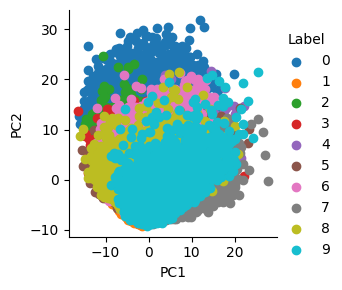

In [34]:


sns.FacetGrid(finr, hue='Label').map(plt.scatter,'PC1','PC2').add_legend()
plt.show()